In [ ]:
import os
import sys 
sys.path.append("/home/binhng/Workspace/robocasa/robocasa")

In [1]:
import json
import os
import random
import time

import h5py
import imageio
import numpy as np
import robosuite
from termcolor import colored
import robocasa


[robosuite WARNING] No private macro file found! (macros.py:57)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:58)
[robosuite WARNING] To setup, run: python /home/binhng/Workspace/robocasa/robosuite/robosuite/scripts/setup_macros.py (macros.py:59)
[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)


In [2]:

dataset_path = '/home/binhng/Workspace/robocasa/robocasa/datasets/test/PnPCabToCounter.hdf5'
f = h5py.File(dataset_path, "r")
env_meta = json.loads(f["data"].attrs["env_args"])
env_meta['env_kwargs']['camera_depths'] = True 
env_meta['env_kwargs']['camera_heights'] = 512 #256
env_meta['env_kwargs']['camera_widths'] = 512 #256
env_meta['env_kwargs']['camera_segmentations'] = 'element' # element' #'instance'
f.close()

env_kwargs = env_meta["env_kwargs"]
env_kwargs["env_name"] = env_meta["env_name"]
env_kwargs["has_renderer"] = False
env_kwargs["renderer"] = "mjviewer"
env_kwargs["has_offscreen_renderer"] = True #write_video
env_kwargs["use_camera_obs"] = True

env = robosuite.make(**env_kwargs)

[robosuite INFO] Loading controller configuration from: /home/binhng/Workspace/robocasa/robosuite/robosuite/controllers/config/robots/default_pandaomron.json (composite_controller_factory.py:121)


obj
distr_counter
distr_cab


In [ ]:
 import robomimic.utils.env_utils as EnvUtils
 EnvUtils.create_env_from_metadata(
        env_meta=env_meta,
        env_name=env_name,
        render=False, 
        render_offscreen=enable_render,
        use_image_obs=enable_render, 
    )

In [137]:
data['data'].keys()

<KeysViewHDF5 ['demo_1181', 'demo_1217', 'demo_1236', 'demo_1251', 'demo_1518', 'demo_1585', 'demo_1711', 'demo_1801', 'demo_1902', 'demo_196', 'demo_2127', 'demo_2128', 'demo_2157', 'demo_2274', 'demo_2543', 'demo_2630', 'demo_2684', 'demo_2995', 'demo_320', 'demo_328', 'demo_361', 'demo_436', 'demo_453', 'demo_522', 'demo_61', 'demo_758', 'demo_804', 'demo_825', 'demo_902', 'demo_930']>

In [4]:
import h5py 
from robocasa.utils.env_utils import create_env  
from robocasa.scripts.playback_dataset import reset_to  

data_path = '/home/binhng/Workspace/robocasa/robocasa/datasets/robocasa_30_demos_debug/PnPCabToCounter.hdf5'
data = h5py.File(data_path, 'r')
model_xml = data["data/demo_1236"].attrs["model_file"]
# init_state = data['data']['demo_1181']['states'][0]
init_state = data["data/{}/states".format("demo_1236")][()][0]
ep_meta = data['data']['demo_1236'].attrs['ep_meta']
# state_dict = {
#     'states': init_state,
    
# }

state = {  
    "states": init_state,  # numpy array from dataset  
    "model": model_xml,      # optional model file  
    "ep_meta": ep_meta     # optional episode metadata  
}  
hehe = reset_to(env, state)

In [113]:
import json 
kiki = json.loads(ep_meta)

In [5]:
env.obj_body_id


{'obj': 206, 'distr_counter': 207, 'distr_cab': 208}

In [6]:
env.objects

{'obj': <robocasa.models.objects.objects.MJCFObject at 0x75b675f2caf0>,
 'distr_counter': <robocasa.models.objects.objects.MJCFObject at 0x75b675f2d300>,
 'distr_cab': <robocasa.models.objects.objects.MJCFObject at 0x75b675f2dc90>}

In [117]:
# kiki

In [45]:
a = env.step(np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [86]:
# a[0]['robot0_agentview_right_segmentation_instance']

In [46]:
env.find_object_cfg_by_name('obj')

{'name': 'obj',
 'obj_groups': 'all',
 'exclude_obj_groups': None,
 'graspable': True,
 'placement': {'fixture': 'cab_2_left_group',
  'size': [0.5, 0.2],
  'pos': [0, -1.0]},
 'type': 'object',
 'info': {'groups_containing_sampled_obj': ['all', 'jam', 'packaged_food'],
  'groups': '/home/binhng/Workspace/robocasa/robocasa/robocasa/models/assets/objects/objaverse/jam/jam_0/model.xml',
  'cat': 'jam',
  'split': 'A',
  'mjcf_path': '/home/binhng/Workspace/robocasa/robocasa/robocasa/models/assets/objects/objaverse/jam/jam_0/model.xml'}}

In [6]:
env.object_cfgs

[{'name': 'obj',
  'obj_groups': 'all',
  'exclude_obj_groups': None,
  'graspable': True,
  'placement': {'fixture': 'cab_2_left_group',
   'size': [0.5, 0.2],
   'pos': [0, -1.0]},
  'type': 'object',
  'info': {'groups_containing_sampled_obj': ['all', 'jam', 'packaged_food'],
   'groups': '/home/binhng/Workspace/robocasa/robocasa/robocasa/models/assets/objects/objaverse/jam/jam_0/model.xml',
   'cat': 'jam',
   'split': 'A',
   'mjcf_path': '/home/binhng/Workspace/robocasa/robocasa/robocasa/models/assets/objects/objaverse/jam/jam_0/model.xml'}},
 {'name': 'distr_counter',
  'obj_groups': 'all',
  'placement': {'fixture': 'counter_1_left_left_group',
   'sample_region_kwargs': {'ref': 'cab_2_left_group'},
   'size': [1.0, 0.3],
   'pos': [0.0, 1.0],
   'offset': [0.0, -0.05]},
  'type': 'object',
  'info': {'groups_containing_sampled_obj': ['all', 'rolling_pin', 'tool'],
   'groups': '/home/binhng/Workspace/robocasa/robocasa/robocasa/models/assets/objects/objaverse/rolling_pin/rollin

In [105]:
env.objects.keys()

dict_keys(['obj', 'distr_counter', 'distr_cab'])

In [62]:
json.loads(ep_meta)

{'layout_id': 3,
 'style_id': 3,
 'object_cfgs': [{'name': 'obj',
   'obj_groups': 'all',
   'exclude_obj_groups': None,
   'graspable': True,
   'placement': {'fixture': 'cab_2_left_group',
    'size': [0.5, 0.2],
    'pos': [0, -1.0]},
   'type': 'object',
   'info': {'groups_containing_sampled_obj': ['all', 'jam', 'packaged_food'],
    'groups': ['all'],
    'cat': 'jam',
    'split': 'A',
    'mjcf_path': '/home/abhim/robocasa/robocasa/robocasa/models/assets/objects/objaverse/jam/jam_0/model.xml'}},
  {'name': 'distr_counter',
   'obj_groups': 'all',
   'placement': {'fixture': 'counter_1_left_left_group',
    'sample_region_kwargs': {'ref': 'cab_2_left_group'},
    'size': [1.0, 0.3],
    'pos': [0.0, 1.0],
    'offset': [0.0, -0.05]},
   'type': 'object',
   'info': {'groups_containing_sampled_obj': ['all', 'rolling_pin', 'tool'],
    'groups': ['all'],
    'cat': 'rolling_pin',
    'split': 'A',
    'mjcf_path': '/home/abhim/robocasa/robocasa/robocasa/models/assets/objects/objav

In [109]:
np.unique(b)

array([  1,  19,  62,  64,  67,  75,  80,  92,  95,  99, 129, 738, 741,
       761, 763, 798, 799], dtype=int32)

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

plt.imshow(a[0]['robot0_agentview_left_segmentation_element'])

NameError: name 'a' is not defined

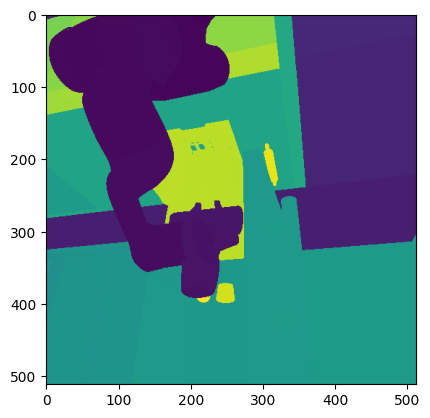

In [48]:

plt.imshow(a[0]['robot0_agentview_right_segmentation_element'])

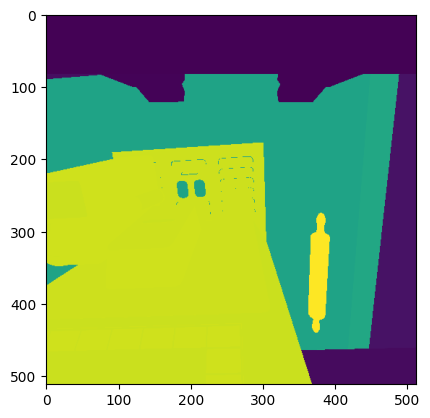

In [36]:
plt.imshow(a[0]['robot0_eye_in_hand_segmentation_element'])

In [72]:
a[0]['robot0_eye_in_hand_segmentation_element'][400:500, 350:400]

array([[[575],
        [575],
        [575],
        ...,
        [575],
        [575],
        [575]],

       [[575],
        [575],
        [575],
        ...,
        [575],
        [575],
        [575]],

       [[575],
        [575],
        [575],
        ...,
        [575],
        [575],
        [575]],

       ...,

       [[877],
        [877],
        [877],
        ...,
        [ 84],
        [ 84],
        [ 84]],

       [[877],
        [877],
        [877],
        ...,
        [ 84],
        [ 84],
        [ 84]],

       [[877],
        [877],
        [877],
        ...,
        [ 84],
        [ 84],
        [ 84]]], dtype=int32)

In [91]:
np.unique(a[0]['robot0_eye_in_hand_segmentation_element'][400:500, 350:400])

array([ 58,  84, 575, 599, 877, 949], dtype=int32)

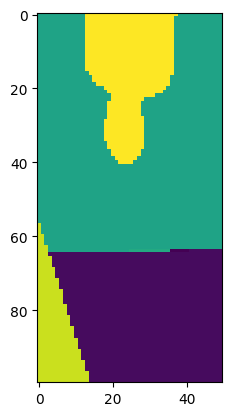

In [92]:
plt.imshow(a[0]['robot0_eye_in_hand_segmentation_element'][400:500, 350:400])



In [51]:
np.unique(a[0]['robot0_eye_in_hand_segmentation_element'])

array([ 58,  62,  64,  67,  73,  84,  92, 100, 103, 575, 582, 589, 593,
       599, 610, 618, 841, 876, 877, 878, 879, 880, 881, 882, 883, 884,
       885, 886, 949], dtype=int32)

In [52]:
env.model

In [53]:
[575, 841, 949]

[575, 841, 949]

In [ ]:
575, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886
58,  84, 575, 599, 877, 949

In [8]:
nb = 58

for key in env.model.classes_to_ids.keys():
    if nb in env.model.classes_to_ids[key]['geom']:
        print(key)
    elif nb in env.model.classes_to_ids[key]['site']:
        print(key)
        

Counter
PandaOmron


In [11]:
for i in env.model.mujoco_objects:
    print(i.name)


wall_room
wall_backing_room
wall_left_room
wall_left_backing_room
outlet_room
outlet_2_room
light_switch_room
light_switch_2_room
floor_room
floor_backing_room
counter_corner_main_main_group
counter_main_main_group
stovetop_main_group
counter_1_right_main_group
fridge_main_group
fridge_housing_main_group
stack_1_main_group_base
stack_1_main_group_1
stack_1_main_group_2
stack_1_main_group_3
stack_1_main_group_4
stack_2_main_group_base
stack_2_main_group_1
stack_2_main_group_2
stack_3_main_group_base
stack_3_main_group_1
stack_3_main_group_2
stack_3_main_group_3
hood_main_group
cab_main_main_group
shelves_main_group
fridge_cab_main_group
toaster_main_group
utensil_holder_main_group
cab_1_left_group
window_group_left_group
cab_2_left_group
cab_corner_3_left_group
cab_corner_4_left_group
sink_left_group
counter_1_left_left_group
counter_corner_left_group
island_left_group
bottom_left_group_base
bottom_left_group_1
bottom_left_group_2
oven_left_group
oven_housing_left_group
microwave_left_g

In [12]:
env.model.classes_to_ids.keys()


dict_keys(['Wall', 'WallAccessory', 'Floor', 'Counter', 'Stovetop', 'Fridge', 'HousingCabinet', 'Box', 'Drawer', 'HingeCabinet', 'PanelCabinet', 'Hood', 'OpenCabinet', 'Toaster', 'Accessory', 'SingleCabinet', 'FramedWindow', 'Sink', 'Oven', 'Microwave', 'Dishwasher', 'CoffeeMachine', 'Stool', 'PandaOmron', 'OmronMobileBase', 'PandaGripper'])

In [29]:
env.model.instances_to_ids.keys()

dict_keys(['wall_room', 'wall_backing_room', 'wall_left_room', 'wall_left_backing_room', 'outlet_room', 'outlet_2_room', 'light_switch_room', 'light_switch_2_room', 'floor_room', 'floor_backing_room', 'counter_corner_main_main_group', 'counter_main_main_group', 'stovetop_main_group', 'counter_1_right_main_group', 'fridge_main_group', 'fridge_housing_main_group', 'stack_1_main_group_base', 'stack_1_main_group_1', 'stack_1_main_group_2', 'stack_1_main_group_3', 'stack_1_main_group_4', 'stack_2_main_group_base', 'stack_2_main_group_1', 'stack_2_main_group_2', 'stack_3_main_group_base', 'stack_3_main_group_1', 'stack_3_main_group_2', 'stack_3_main_group_3', 'hood_main_group', 'cab_main_main_group', 'shelves_main_group', 'fridge_cab_main_group', 'toaster_main_group', 'utensil_holder_main_group', 'cab_1_left_group', 'window_group_left_group', 'cab_2_left_group', 'cab_corner_3_left_group', 'cab_corner_4_left_group', 'sink_left_group', 'counter_1_left_left_group', 'counter_corner_left_group', 

In [23]:
a[0]['robot0_eye_in_hand_segmentation_element']

array([[[ 62],
        [ 62],
        [ 62],
        ...,
        [ 62],
        [ 62],
        [ 62]],

       [[ 62],
        [ 62],
        [ 62],
        ...,
        [ 62],
        [ 62],
        [ 62]],

       [[ 62],
        [ 62],
        [ 62],
        ...,
        [ 62],
        [ 62],
        [ 62]],

       ...,

       [[878],
        [878],
        [878],
        ...,
        [ 84],
        [ 84],
        [ 84]],

       [[878],
        [878],
        [878],
        ...,
        [ 84],
        [ 84],
        [ 84]],

       [[878],
        [878],
        [878],
        ...,
        [ 84],
        [ 84],
        [ 84]]], dtype=int32)

In [10]:
env.obj_body_id

{'obj': 206, 'distr_counter': 207, 'distr_cab': 208}

In [11]:
hehe

In [95]:
objects = env.objects
objects

{'obj': <robocasa.models.objects.objects.MJCFObject at 0x787a70e52020>,
 'distr_counter': <robocasa.models.objects.objects.MJCFObject at 0x787a70b415a0>,
 'distr_cab': <robocasa.models.objects.objects.MJCFObject at 0x787a70e51720>}

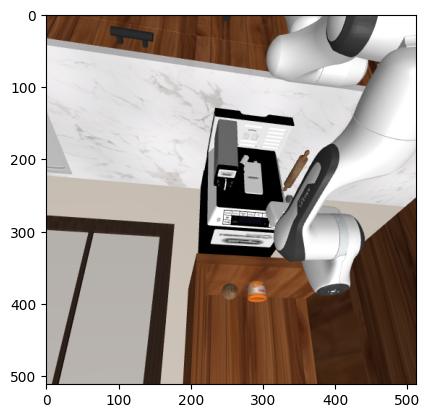

In [83]:
plt.imshow(a[0]['robot0_agentview_left_image'])

In [86]:
b = a[0]['robot0_eye_in_hand_segmentation_element']
np.unique(b)

array([ 58,  62,  64,  67,  73,  84,  92, 100, 103, 575, 582, 589, 593,
       599, 610, 618, 841, 876, 877, 878, 879, 880, 881, 882, 883, 884,
       885, 886, 949], dtype=int32)

In [ ]:
env.model.classes_to_ids.keys()

In [102]:
env.model.mujoco_objects

In [14]:
for k in a[0].keys():
    print(k)

robot0_joint_pos
robot0_joint_pos_cos
robot0_joint_pos_sin
robot0_joint_vel
robot0_joint_acc
robot0_eef_pos
robot0_eef_quat
robot0_eef_quat_site
robot0_gripper_qpos
robot0_gripper_qvel
robot0_base_pos
robot0_base_quat
robot0_base_to_eef_pos
robot0_base_to_eef_quat
robot0_base_to_eef_quat_site
robot0_agentview_left_image
robot0_agentview_left_depth
robot0_agentview_left_segmentation_element
robot0_agentview_right_image
robot0_agentview_right_depth
robot0_agentview_right_segmentation_element
robot0_eye_in_hand_image
robot0_eye_in_hand_depth
robot0_eye_in_hand_segmentation_element
obj_pos
obj_quat
obj_to_robot0_eef_pos
obj_to_robot0_eef_quat
distr_counter_pos
distr_counter_quat
distr_counter_to_robot0_eef_pos
distr_counter_to_robot0_eef_quat
distr_cab_pos
distr_cab_quat
distr_cab_to_robot0_eef_pos
distr_cab_to_robot0_eef_quat
robot0_proprio-state
object-state


In [22]:
len(a[0]['object-state'])

42

In [40]:
import h5py 

path = '/home/binhng/Workspace/robocasa/robocasa/datasets/regenerate/robocasa-30demos-5chosen-tasks/TurnOffStove.hdf5'
f = h5py.File(path, 'r')

In [41]:
f['data']

<HDF5 group "/data" (20 members)>

In [29]:
import json
json.loads(f.attrs['env_args'])

KeyError: "Unable to synchronously open attribute (can't locate attribute: 'env_args')"